In [67]:
#import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter


In [68]:
 races = ['Total!!Population of one race!!White alone',
           'Total!!Population of one race!!Black or African American alone',
           'Total!!Population of one race!!American Indian and Alaska Native alone',
           'Total!!Population of one race!!Asian alone',
           'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander alone',
           'Total!!Population of one race!!Some Other Race alone',
           'Total!!Two or More Races!!Population of two races!!White; Black or African American',
           'Total!!Two or More Races!!Population of two races!!White; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!White; Asian',
           'Total!!Two or More Races!!Population of two races!!White; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!White; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Asian',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Asian; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Asian',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of six races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race']
            
    

In [2]:
def mismatch(county, directory, data_type):
    
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]

    dfinal = pd.DataFrame(columns=['filename', 'total_row_number', 'all_row_mismatch', 'race_mismatch', 'age_mismatch', 'sex_mismatch'])

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            #print(filename)
            df = pd.read_csv(directory+filename)
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  
            df = df.loc[:, ~df.columns.str.contains('SwapVal')] 
            #TOTAL ROW
            total_rows = 0
            mismatch_total_rows = 0
            for i, row in df.iterrows():
                total_rows +=1
#                 print(df_orig.loc[i])
#                 print(row)
                if df_orig.loc[i].equals(row):
                    mismatch_total_rows = mismatch_total_rows
                else:
                    mismatch_total_rows +=1
            #RACE
            mismatch_race_rows = 0
            for i, row in df.iterrows():
                if(df_orig.loc[i]['race'] != row['race']):
                    mismatch_race_rows +=1
            #AGE
            mismatch_age_rows = 0
            for i, row in df.iterrows():
                if(df_orig.loc[i]['age'] != row['age']):
                    mismatch_age_rows +=1
            #SEX
            mismatch_sex_rows = 0
            for i, row in df.iterrows():
                if(df_orig.loc[i]['sex'] != row['sex']):
                    mismatch_sex_rows +=1
            dfinal = dfinal.append({'filename': filename, 'total_row_number': total_rows, 'all_row_mismatch': mismatch_total_rows, 'race_mismatch': mismatch_race_rows, 'age_mismatch': mismatch_age_rows, 'sex_mismatch': mismatch_sex_rows}, ignore_index=True)
    print(dfinal)
    fa = "data/"+county+"/"+data_type+"/"+county+".csv"
    csv_orig_data = dfinal.to_csv(fa, index = True)

In [4]:

counties = ['alameda', 'armstrong', 'cibola', 'fayette', 'grandforks', 'hawaii', 'jefferson', 'nantucket', 'washington']

for county in counties:
    print(county)
    mismatch(county,'../swapping_algorithm/swap_runs/'+county+'/swaprun2/','swap2')
    mismatch(county,'../swapping_algorithm/swap_runs/'+county+'/swaprun1/','swap1')
    #mismatch(county,'../dp_algorithm/dp_runs/'+county+'/','dp')

alameda
                       filename total_row_number all_row_mismatch  \
0                 swap_0.01.csv             1429               14   
1                 swap_0.02.csv             1429               42   
2                 swap_0.03.csv             1429               80   
3                 swap_0.04.csv             1429              128   
4                 swap_0.05.csv             1429              167   
..                          ...              ...              ...   
94  swap_0.9500000000000001.csv             1429             1421   
95  swap_0.9600000000000001.csv             1429             1422   
96                swap_0.97.csv             1429             1426   
97                swap_0.98.csv             1429             1425   
98                swap_0.99.csv             1429             1419   

   race_mismatch age_mismatch sex_mismatch  
0              0           14            9  
1              0           42           26  
2              0           7

                       filename total_row_number all_row_mismatch  \
0                 swap_0.01.csv             1034               18   
1                 swap_0.02.csv             1034               45   
2                 swap_0.03.csv             1034               73   
3                 swap_0.04.csv             1034              120   
4                 swap_0.05.csv             1034              167   
..                          ...              ...              ...   
94  swap_0.9500000000000001.csv             1034             1033   
95  swap_0.9600000000000001.csv             1034             1033   
96                swap_0.97.csv             1034             1032   
97                swap_0.98.csv             1034             1032   
98                swap_0.99.csv             1034             1033   

   race_mismatch age_mismatch sex_mismatch  
0              9           10            3  
1             26           29           10  
2             49           50       

                       filename total_row_number all_row_mismatch  \
0                 swap_0.01.csv             1107               17   
1                 swap_0.02.csv             1107               40   
2                 swap_0.03.csv             1107               80   
3                 swap_0.04.csv             1107              125   
4                 swap_0.05.csv             1107              172   
..                          ...              ...              ...   
94  swap_0.9500000000000001.csv             1107             1102   
95  swap_0.9600000000000001.csv             1107             1099   
96                swap_0.97.csv             1107             1102   
97                swap_0.98.csv             1107             1105   
98                swap_0.99.csv             1107             1102   

   race_mismatch age_mismatch sex_mismatch  
0              8           11            8  
1             26           28           16  
2             43           60       

In [ ]:
print(dfinal)


Counter({'Total!!Population of one race!!White alone': 881, 'Total!!Population of one race!!Black or African American alone': 264, 'Total!!Population of one race!!Asian alone': 115, 'Total!!Population of one race!!Some Other Race alone': 43, 'Total!!Two or More Races!!Population of two races!!White; Asian': 28, 'Total!!Two or More Races!!Population of two races!!White; Black or African American': 15, 'Total!!Two or More Races!!Population of two races!!White; American Indian and Alaska Native': 15, 'Total!!Population of one race!!American Indian and Alaska Native alone': 14, 'Total!!Two or More Races!!Population of three races!!White; Black or African American; American Indian and Alaska Native': 9, 'Total!!Two or More Races!!Population of two races!!White; Some Other Race': 7, 'Total!!Two or More Races!!Population of two races!!Black or African American; Asian': 7, 'Total!!Two or More Races!!Population of two races!!Black or African American; American Indian and Alaska Native': 5, 'Tot

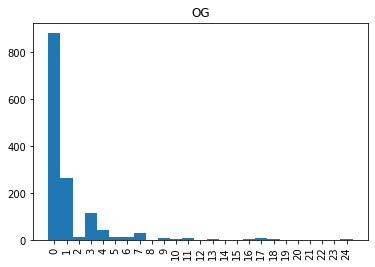

swap_0.01.csv


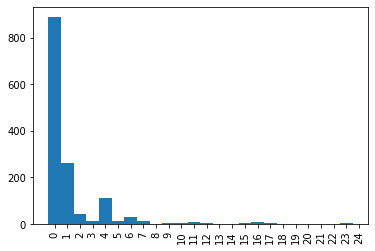

swap_0.02.csv


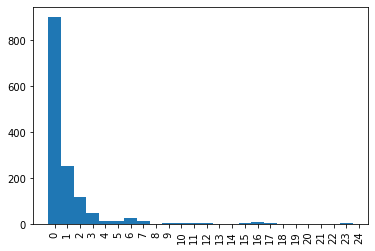

swap_0.03.csv


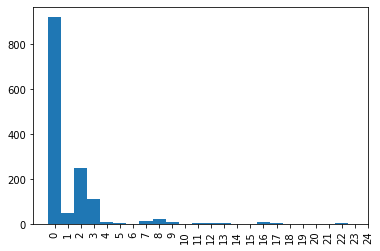

swap_0.04.csv


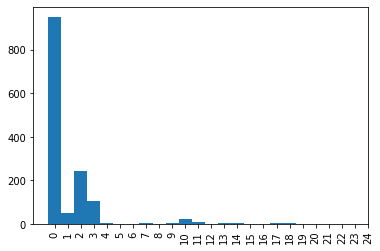

swap_0.05.csv


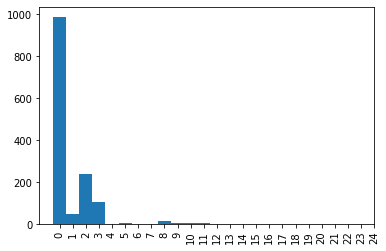

swap_0.060000000000000005.csv


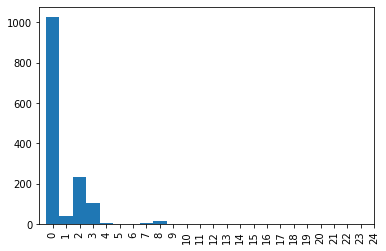

swap_0.06999999999999999.csv


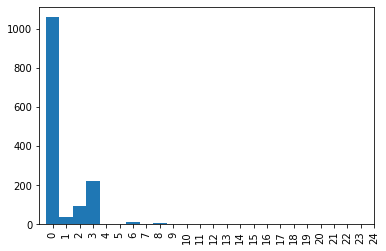

swap_0.08.csv


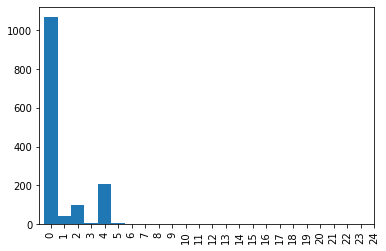

swap_0.09.csv


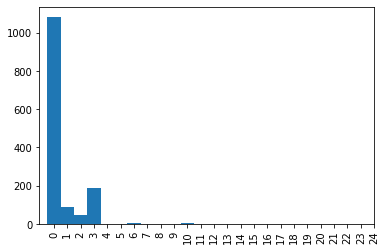

swap_0.09999999999999999.csv


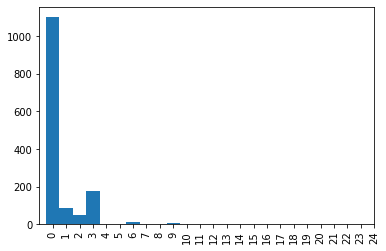

swap_0.11.csv


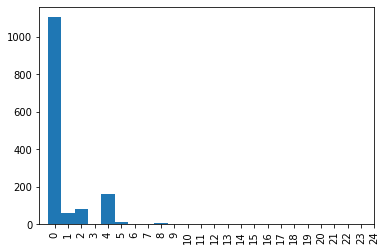

swap_0.12.csv


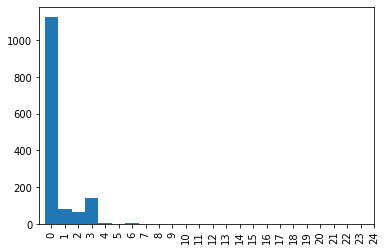

swap_0.13.csv


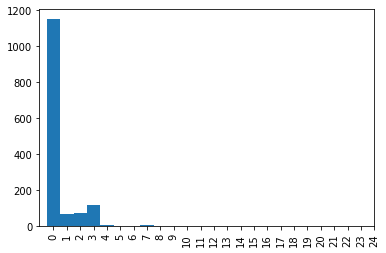

swap_0.14.csv


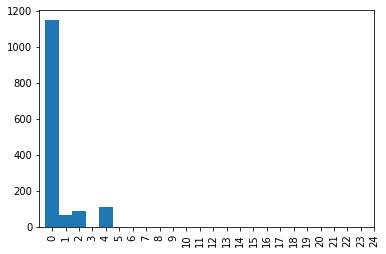

swap_0.15000000000000002.csv


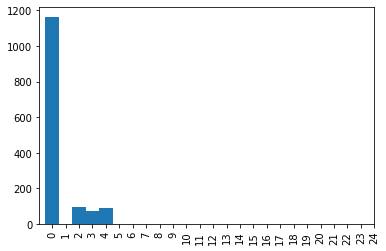

swap_0.16.csv


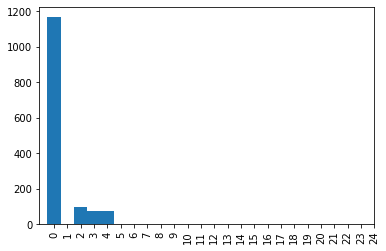

swap_0.17.csv


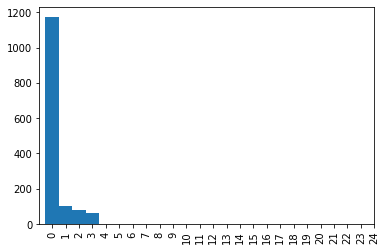

swap_0.18000000000000002.csv


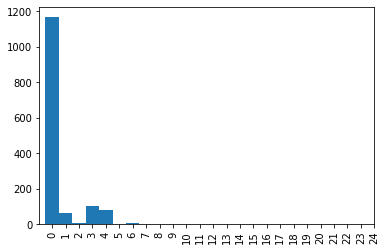

swap_0.19.csv


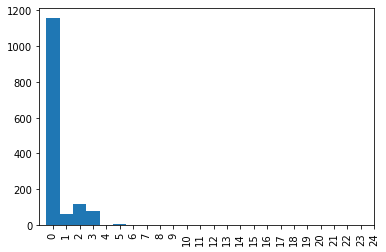

swap_0.2.csv


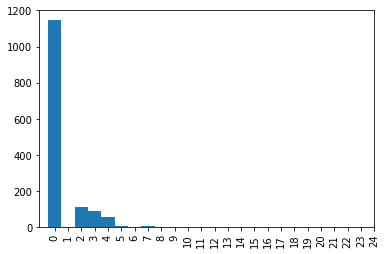

swap_0.21000000000000002.csv


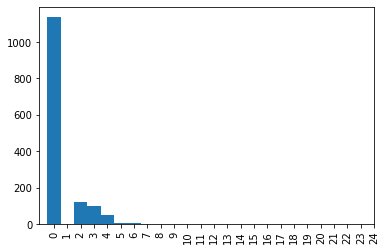

swap_0.22.csv


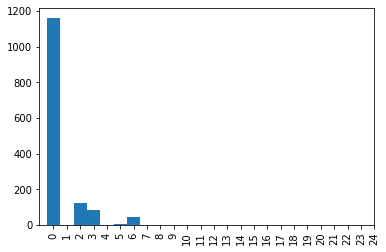

swap_0.23.csv


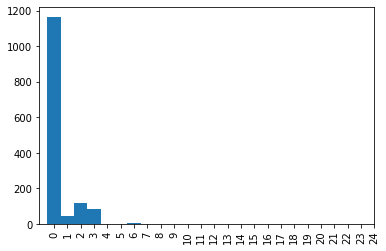

swap_0.24000000000000002.csv


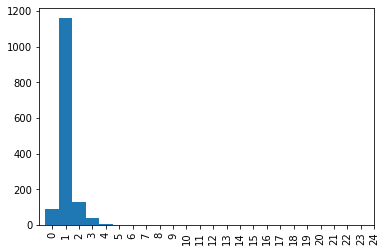

swap_0.25.csv


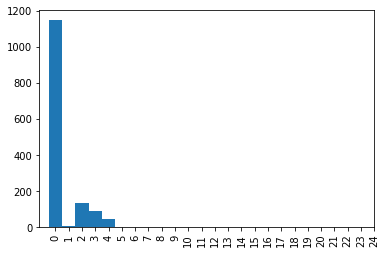

swap_0.26.csv


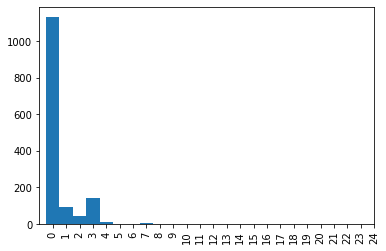

swap_0.27.csv


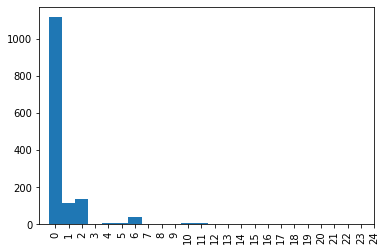

swap_0.28.csv


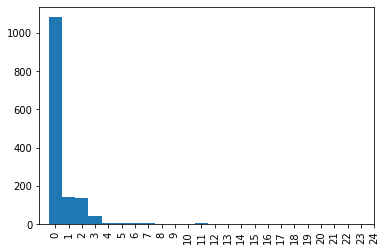

swap_0.29000000000000004.csv


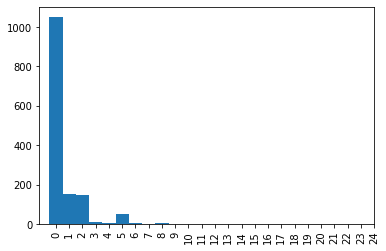

swap_0.3.csv


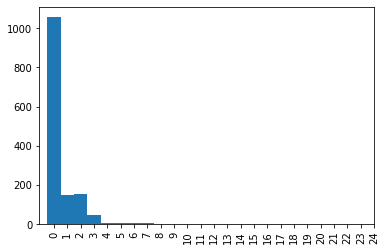

swap_0.31.csv


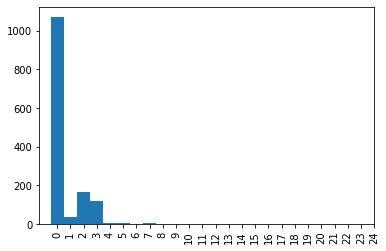

swap_0.32.csv


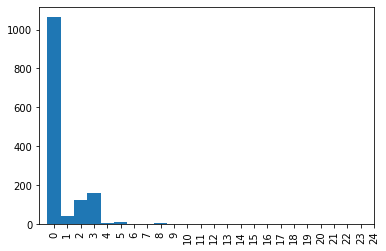

swap_0.33.csv


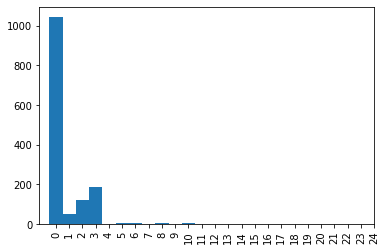

swap_0.34.csv


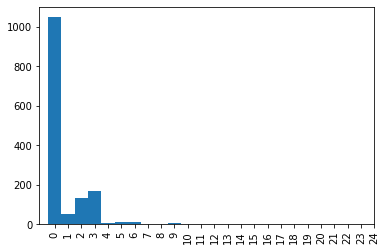

swap_0.35000000000000003.csv


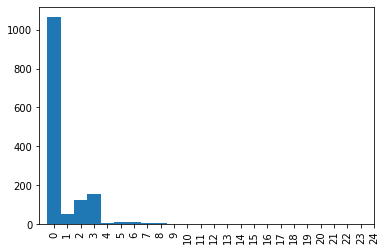

swap_0.36000000000000004.csv


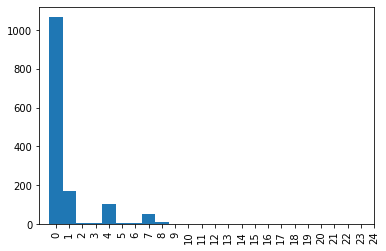

swap_0.37.csv


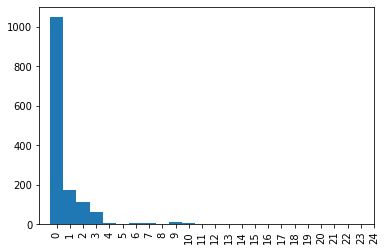

swap_0.38.csv


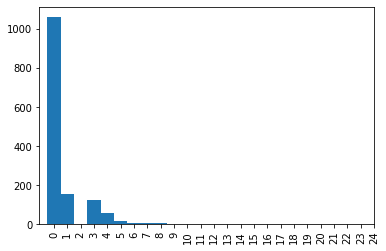

swap_0.39.csv


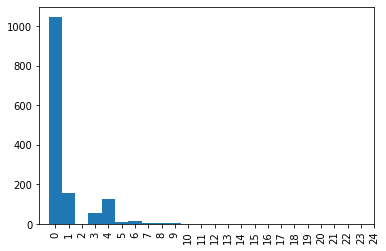

swap_0.4.csv


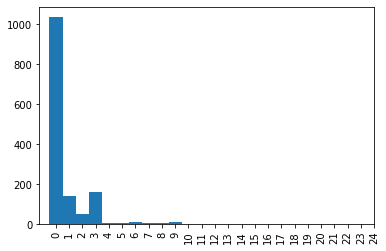

swap_0.41000000000000003.csv


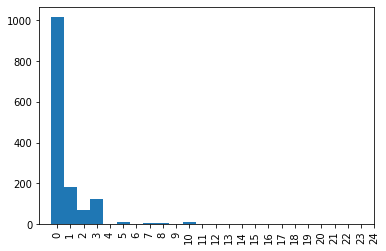

swap_0.42000000000000004.csv


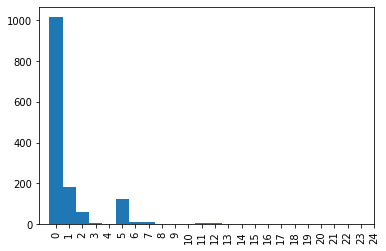

swap_0.43.csv


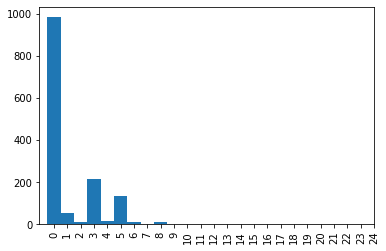

swap_0.44.csv


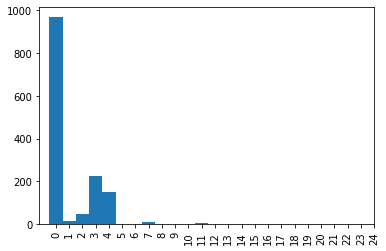

swap_0.45.csv


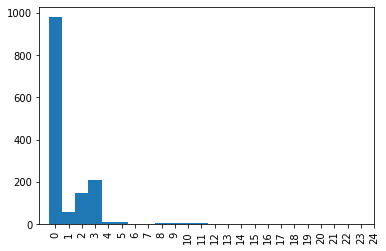

swap_0.46.csv


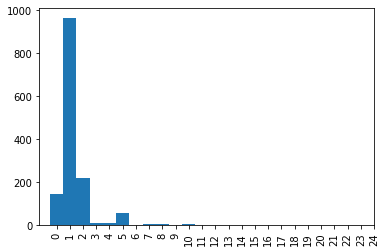

swap_0.47000000000000003.csv


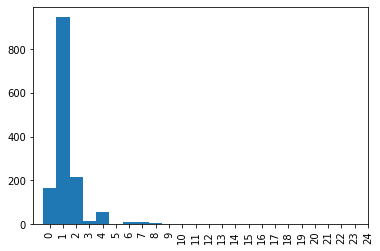

swap_0.48000000000000004.csv


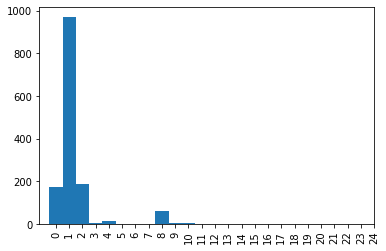

swap_0.49.csv


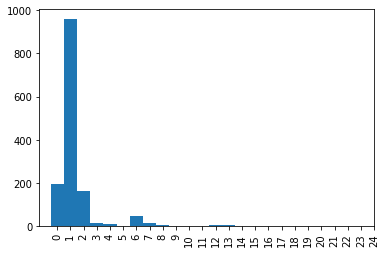

swap_0.5.csv


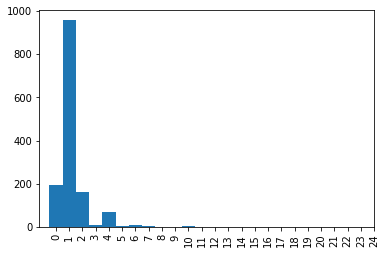

swap_0.51.csv


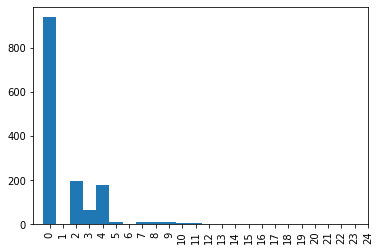

swap_0.52.csv


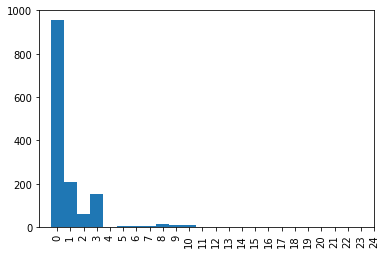

swap_0.53.csv


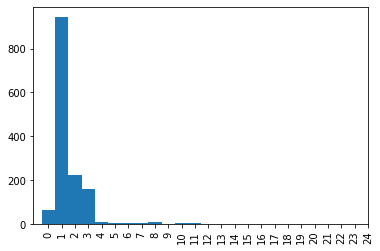

swap_0.54.csv


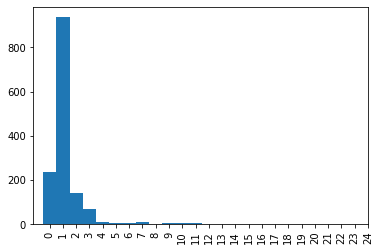

swap_0.55.csv


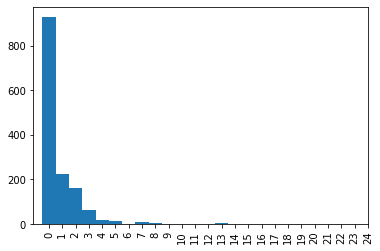

swap_0.56.csv


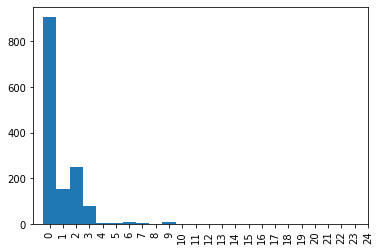

swap_0.5700000000000001.csv


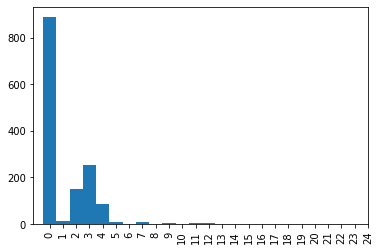

swap_0.5800000000000001.csv


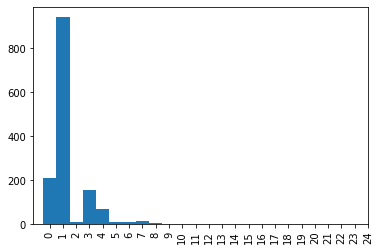

swap_0.59.csv


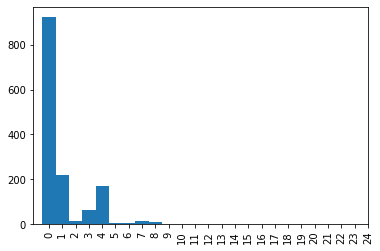

swap_0.6.csv


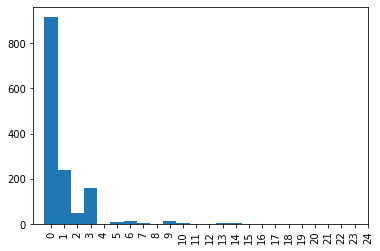

swap_0.61.csv


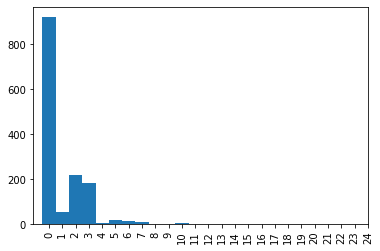

swap_0.62.csv


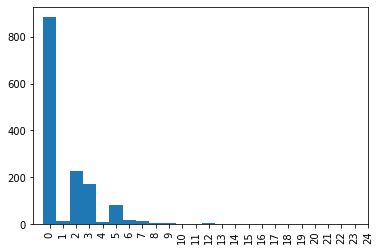

swap_0.63.csv


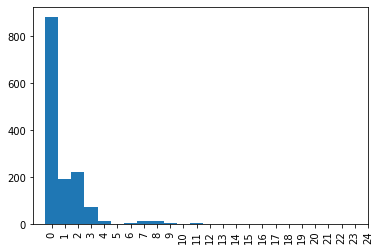

swap_0.64.csv


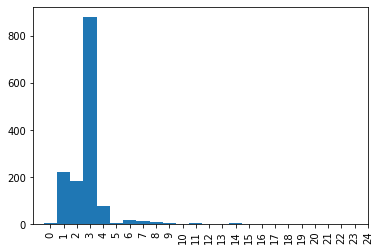

swap_0.65.csv


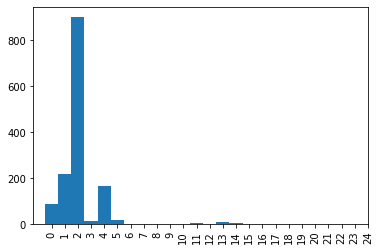

swap_0.66.csv


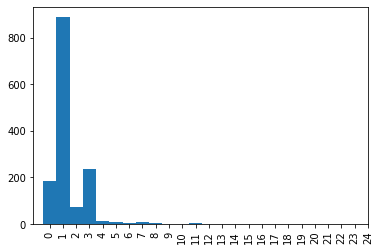

swap_0.67.csv


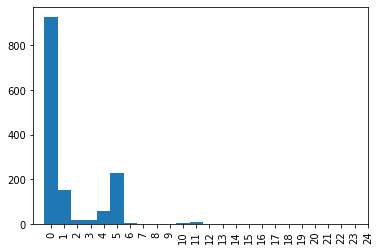

swap_0.68.csv


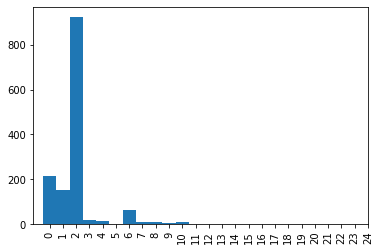

swap_0.6900000000000001.csv


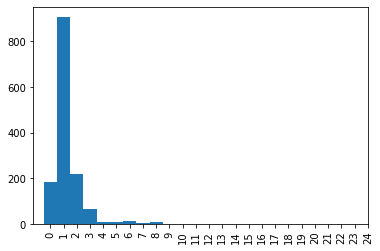

swap_0.7000000000000001.csv


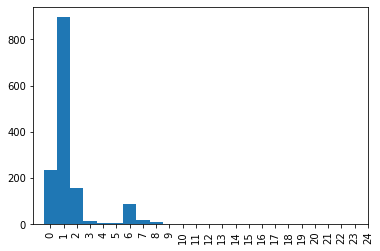

swap_0.7100000000000001.csv


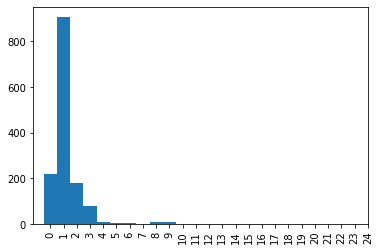

swap_0.72.csv


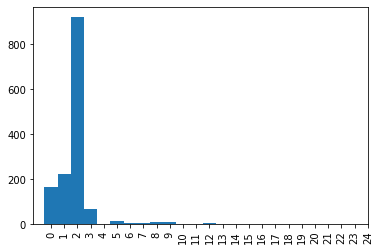

swap_0.73.csv


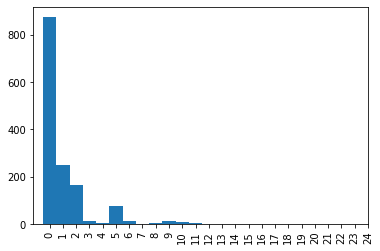

swap_0.74.csv


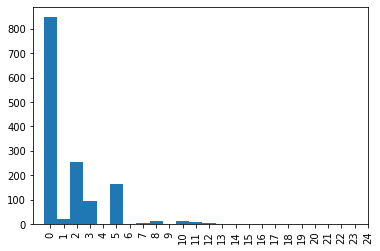

swap_0.75.csv


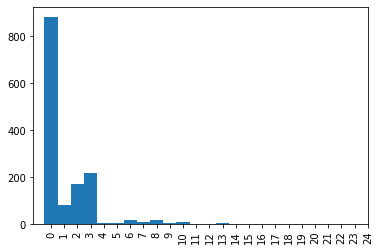

swap_0.76.csv


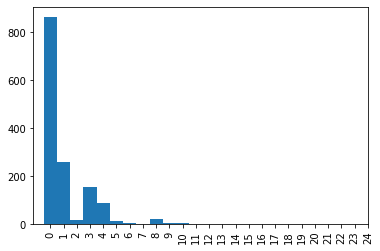

swap_0.77.csv


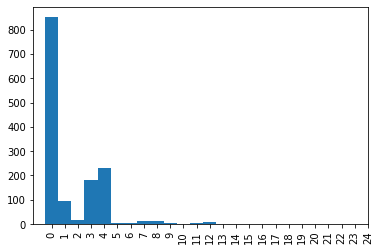

swap_0.78.csv


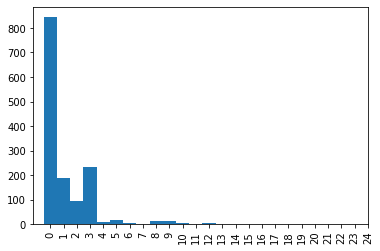

swap_0.79.csv


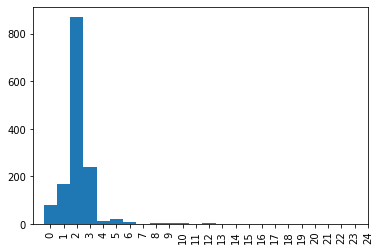

swap_0.8.csv


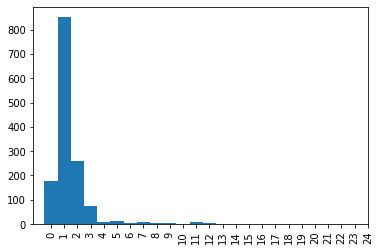

swap_0.81.csv


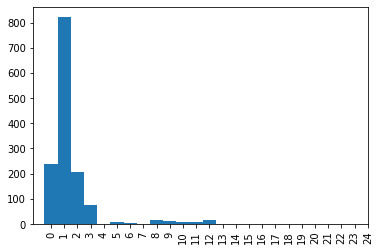

swap_0.8200000000000001.csv


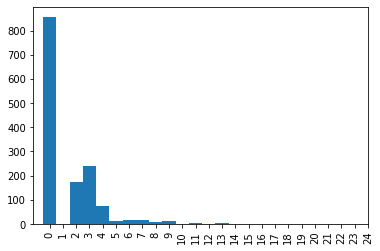

swap_0.8300000000000001.csv


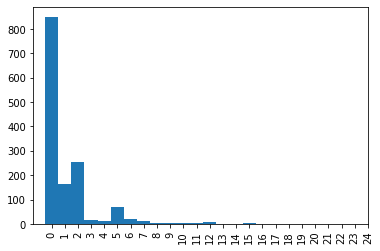

swap_0.8400000000000001.csv


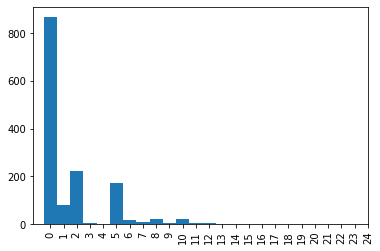

swap_0.85.csv


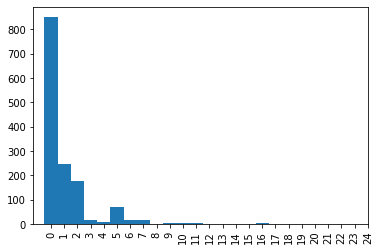

swap_0.86.csv


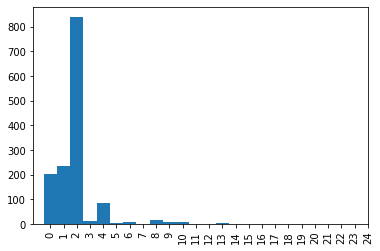

swap_0.87.csv


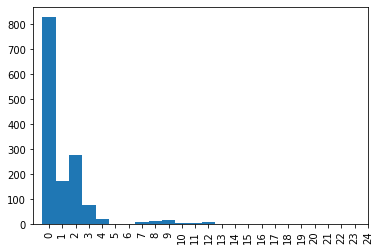

swap_0.88.csv


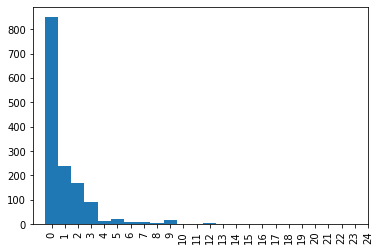

swap_0.89.csv


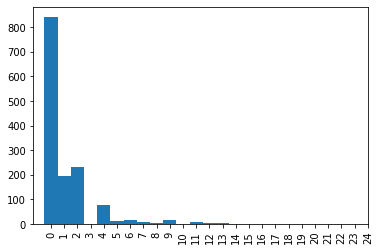

swap_0.9.csv


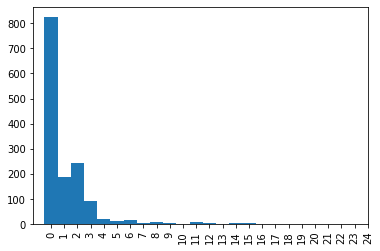

swap_0.91.csv


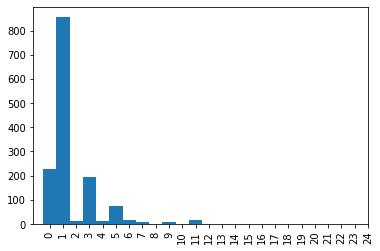

swap_0.92.csv


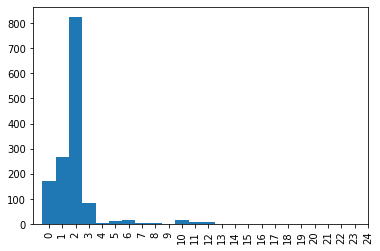

swap_0.93.csv


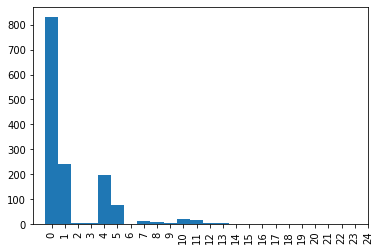

swap_0.9400000000000001.csv


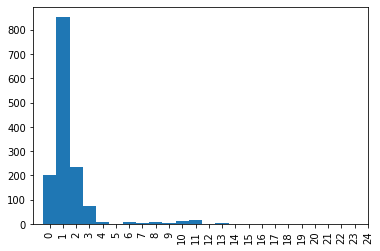

swap_0.9500000000000001.csv


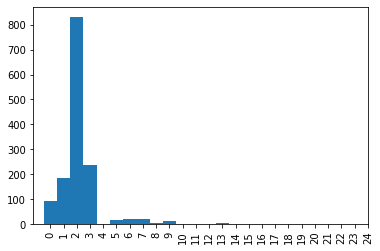

swap_0.9600000000000001.csv


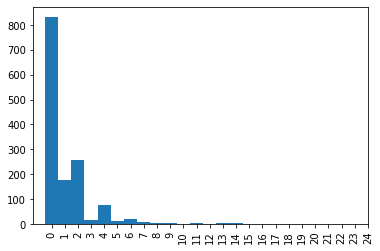

swap_0.97.csv


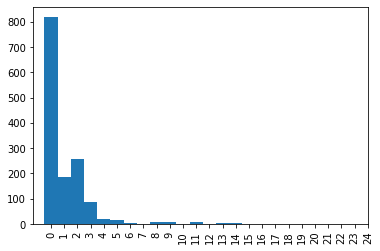

swap_0.98.csv


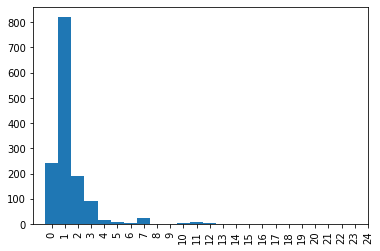

swap_0.99.csv


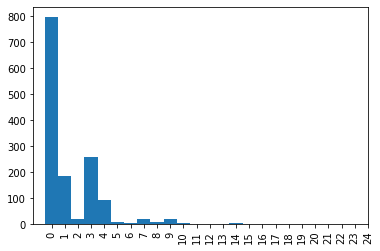

<Figure size 432x288 with 0 Axes>

In [21]:
def make_hist(county, directory, data_type, column):
    
    
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for key1, value1 in df_orig.iteritems():
        if(key1 == column):
            labels, values = zip(*Counter(value1).items())
            indexes_all = np.arange(len(labels))
            indexes = indexes_all
            print(Counter(value1))
            width = 1
            plt.bar(indexes, values, width)
            plt.xticks(indexes, rotation='vertical')
            plt.title("OG")
            plt.show()
            plt.savefig('data/'+county+'/'+data_type+'/histograms/'+column+'/orig.png')

    
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            print(filename)
            df = pd.read_csv (directory+filename)
            for key, value in df.iteritems():
                if(key == column):
                    labels, values = zip(*Counter(value).items())
                    indexes = np.arange(len(labels))
                    #print(Counter(value))
                    width = 1
                    plt.bar(indexes, values, width)
                    plt.xticks(indexes_all, rotation='vertical')
                    plt.show()
                    plt.savefig('data/'+county+'/'+data_type+'/histograms/'+column+'/'+(filename[:len(filename)-4])+'.png')
                    
                    
make_hist('alameda','../swapping_algorithm/swap_runs/alameda/swaprun2/', 'swap2', 'race')

[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92
 96]
25


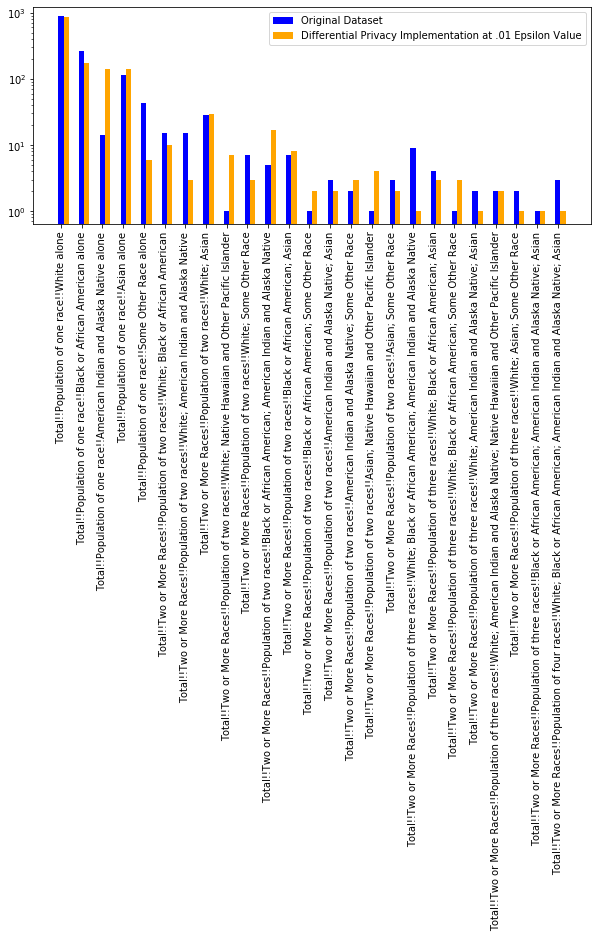

<Figure size 432x288 with 0 Axes>

In [58]:

def make_hist_both(county, file, file2, column):
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for key1, value1 in df_orig.iteritems():
        if(key1 == column):
            labs, vals = zip(*Counter(value1).items())
            indexes_all = np.arange(len(labs))
            
    df = pd.read_csv (file)
    for key, value in df.iteritems():
        if(key == column):
            labels, values = zip(*Counter(value).items())
            indexes = np.arange(len(labels))
    df2 = pd.read_csv(file2)
    for key, value in df2.iteritems():
        if(key == column):
            labels2, values2 = zip(*Counter(value).items())
            indexes2 = np.arange(len(labels2))
            
    f = plt.figure()
    f.set_figwidth(10)           
    x = np.arange(25)*4
    print(x)
    ax1 = plt.subplot(1,1,1) 
    w = 1
    print(len(labs))
    plt.xticks(x , labs, rotation='vertical')
    #pop =ax1.bar(2*indexes, values, width=w, color='b', align='center')
    pop = ax1.bar(4*indexes_all, vals, width=w, color='b', align='center')
    plt.yscale("log")
    #ax2 = ax1.twinx()              
    pop2 = ax1.bar(4*indexes2+1, values2, width=w, color='orange', align='center')
    plt.yscale("log")
    plt.legend([pop, pop2],['Original Dataset', 'Differential Privacy Implementation at .01 Epsilon Value'])
    plt.show()
    plt.savefig('0.01DP_and_orig.png')
            
make_hist_both('alameda','../swapping_algorithm/swap_runs/alameda/swaprun1/swap_0.99.csv', '../dp_algorithm/dp_runs/alameda/dprun_0.01.csv', 'race')



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
63
[881, 264, 14, 115, 0, 43, 15, 15, 28, 1, 7, 5, 7, 0, 1, 3, 0, 2, 1, 3, 0, 9, 4, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1106, 180, 0, 74, 0, 51, 1, 3, 9, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


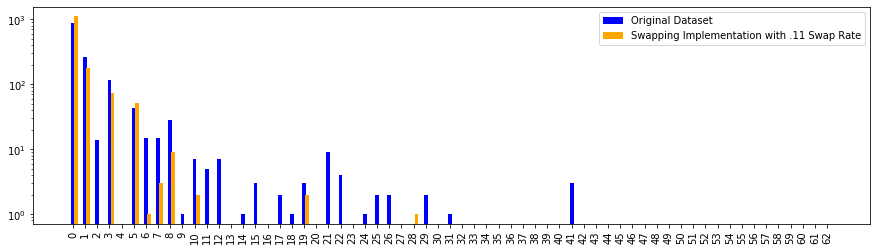

In [158]:

def make_hist_both(county, file2, column):
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    labels_all = []
    vals_all = []
    for key1, value1 in df_orig.iteritems():
        if(key1 == column):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            for i in races:
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])                                       
            indexes_all = np.arange(len(labels_all))
    print(indexes_all)
                         
    df2 = pd.read_csv(file2)
    labels2_all = []
    vals2_all = []
    for key, value in df2.iteritems():
        if(key == column):
            labels2, values2 = zip(*Counter(value).items())
            labels2=list(labels2)
            values2 = list(values2)
            for i in races:
                if i not in labels2:
                    labels2_all.append(i)
                    vals2_all.append(0)
                elif i in labels2:
                    pos = labels2.index(i)
                    labels2_all.append(i)
                    vals2_all.append(values2[pos])
            indexes2_all = np.arange(len(labels2_all))
    print(indexes2_all)
            
    
    f = plt.figure()
    f.set_figwidth(15)           
    x = np.arange(63)*4
    #print(x)
    ax1 = plt.subplot(1,1,1) 
    w = 1.25
    final_labels = []
    for l in races:
        pop = l.find("Pop")
        k=l[pop:]
        exc = k.find("!!")
        k=k[exc+2:]
        final_labels.append(k)
    all_label= []
    for l in labels2_all:
        pop = l.find("Pop")
        k=l[pop:]
        exc = k.find("!!")
        k=k[exc+2:]
        all_label.append(k)
    print(len(final_labels))
    plt.xticks(x, indexes_all, rotation='vertical')
    #pop =ax1.bar(2*indexes, values, width=w, color='b', align='center')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes2_all+1, vals2_all, width=w, color='orange', align='center', label='Swapping Implementation with .11 Swap Rate')
    ax1.legend()
    ax1.set_yscale("log")
    f.savefig('swap_.0.11_and_orig.png')
    print(vals_all)
    print(vals2_all)
            
make_hist_both('alameda', '../swapping_algorithm/swap_runs/alameda/swaprun1/swap_9.91.csv', 'race')

